In [27]:
import utils
import pandas as pd
import numpy as np
import sklearn.naive_bayes as nb
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_csv('shot_logs.csv')

In [29]:
features = [
    "SHOT_NUMBER",
    "PERIOD",
#     "GAME_CLOCK",
#     "SHOT_CLOCK",
    "DRIBBLES",
    "TOUCH_TIME",
    "SHOT_DIST",
    "PTS_TYPE",
    "CLOSE_DEF_DIST",
]
target = ['PTS']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.25, random_state=42)

In [31]:
y = y_train.values.ravel()

In [32]:
features_to_scale = [
    "SHOT_NUMBER",
    "PERIOD",
    "DRIBBLES",
    "TOUCH_TIME",
    "SHOT_DIST",
    "CLOSE_DEF_DIST",
]
df = utils.rescale_features(features_to_scale, X_train)

In [33]:
model = nb.BernoulliNB()

In [34]:
def get_score(i=None):
    model.fit(X_train, y)
    return model.score(X_test, y_test)

In [35]:
def shuffle_y(i):
    '''
    Randomly shuffles training shot values in place, refits model then returns score
    '''
    np.random.shuffle(y)
    return get_score()

In [36]:
actual = get_score()
actual
# results = map(shuffle_y, range(10))

0.54634892872759078

(array([ 1.,  0.,  0.,  2.,  1.,  1.,  4.,  0.,  0.,  1.]),
 array([ 0.17255919,  0.20133675,  0.23011431,  0.25889187,  0.28766944,
         0.316447  ,  0.34522456,  0.37400212,  0.40277969,  0.43155725,
         0.46033481]),
 <a list of 10 Patch objects>)

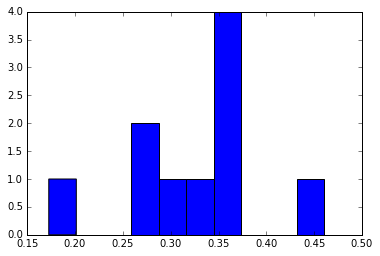

In [37]:
plt.hist(results)